# Applying Neural Networks to recognize handwritten digits
Mình bắt đầu với bài toán đơn giản về nhận diện chữ số viết tay từ 0 đến 9. Dataset được sử dụng là MNIST.

## Load data from the MNIST dataset

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu, softmax
import numpy as np
import matplotlib.pyplot as plt

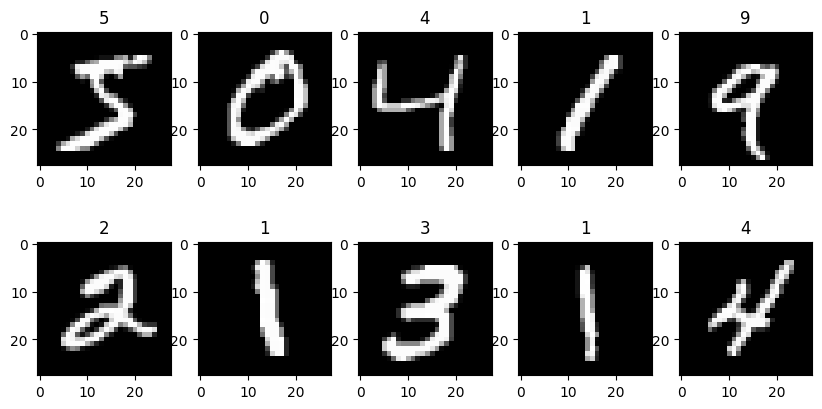

In [6]:
# Load data and visualize the first 10 images and their labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(train_images[i], cmap = "gray")
    axs[i].set_title(train_labels[i])
plt.show()
    

In [9]:
# Show the size of images
img1 = train_images[0]
shape_img1 = img1.shape
print(f"Size of images (in pixels): {shape_img1}")

# Show the minimum and maximum grayscale value of pixels
print(f"Maximum value of pixels: {np.max(img1)}")
print(f"Minimum value of pixels: {np.min(img1)}")

Size of images (in pixels): (28, 28)
Maximum value of pixels: 255
Minimum value of pixels: 0


## Data pre-processing

In [11]:
# Normalize to [0,1] 
train_images = train_images / 255
test_images = test_images / 255

## Construct the neural network

In [26]:
model = Sequential(
    [
        Flatten(input_shape = (28, 28)),
        Dense(128, activation = "relu", name = "L1"),
        Dense(64, activation = "relu", name = "L2"),
        Dense(10, activation = "linear", name = "L3")
    ]
)

model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True), 
    optimizer = Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

history = model.fit(train_images, train_labels, epochs = 50)

c:\Users\5425\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8739 - loss: 0.4267
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9661 - loss: 0.1081
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9782 - loss: 0.0697
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9846 - loss: 0.0496
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9867 - loss: 0.0414
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9902 - loss: 0.0315
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9924 - loss: 0.0235
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9927 - loss: 0.0212
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9942 - loss: 0.0181
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9944 - loss: 0.0170
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9953 - loss: 0.0136
Epoch 12/50
1875/1875 ━━━━━━━━

Biểu diễn độ chính xác và mất mát trên training set trên biểu đồ

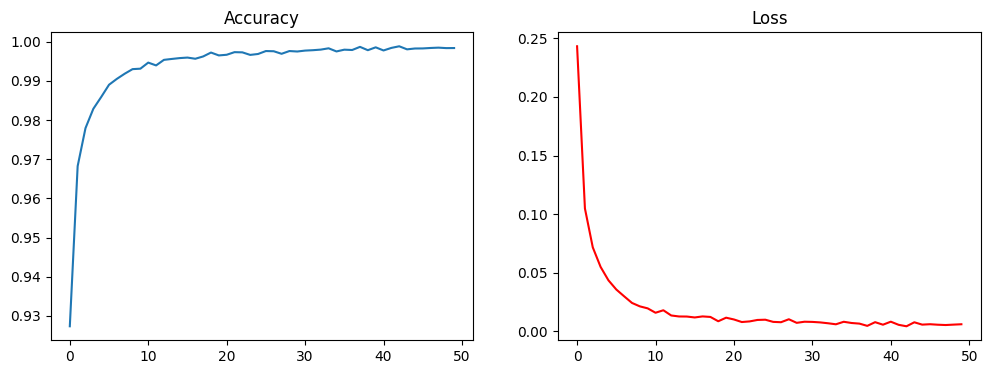

In [29]:
# Plot the training process based on model accuracy and loss
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axs[0].plot(history.history["accuracy"])
axs[0].set_title("Accuracy")
axs[1].plot(history.history["loss"], color = "red")
axs[1].set_title("Loss")
plt.show()


In [30]:
# Evaluate model accuracy of the training set
train_acc = history.history["accuracy"][-1]
print(f"Accuracy on the training set: {train_acc}")
train_loss = history.history["loss"][-1]
print(f"Loss on the training set: {train_loss}")

Accuracy on the training set: 0.9983500242233276
Loss on the training set: 0.006136519834399223


In [31]:
# Model evalution
result = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9761 - loss: 0.2091
